# Regresión Lineal

### CONCLUSIÓN: La regresión lineal simple no pareciera ser modelo para estos datos, puede que porque tengamos pocos datos.

Intente predecir variables correlacionalas, medianamente correlacionadas y no correlacionadas, y ninguna predice bien. Mezcle varriables climaticas con las productivas, tambien use productivas con productivas....

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("datos/csv/datos_produccion_clima_35_1.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(36, 18)

In [3]:
#son 36 registros con 18 columnas. Veamos los primeros registros
data.head()

,fecha,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento,acumulado_anual,acumulado_verano
0,31/12/1985,3514,1419,912,15600,60.46,19.26,4.44,64.27,14.3,6.4,20.9,57.6,208.6,4312.72,6.1,208.1,56.1
1,31/12/1986,3783,1520,680,18167,61.52,19.86,4.80,44.74,12.9,5.8,20.5,58.1,130.3,4236.36,6.8,130.0,20.7
2,31/12/1987,3988,1928,512,11200,55.77,19.41,2.81,26.56,13.8,6.8,20.7,60.3,199.5,4142.41,6.4,199.3,77.1
3,31/12/1988,3590,1560,310,13197,61.69,18.65,3.68,19.87,12.9,5.5,20.4,54.9,85.5,4225.09,6.3,85.4,29.0
4,31/12/1989,2830,1210,150,12300,57.13,19.82,4.35,12.40,14.5,7.1,21.9,56.5,92.5,4195.38,6.3,92.0,12.8


In [4]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento,acumulado_anual,acumulado_verano
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2910.166667,1497.805556,522.527778,11813.388889,58.548611,19.573611,4.143889,34.732778,13.452778,5.805556,21.150000,52.822222,181.741667,4298.099167,7.372222,181.341667,49.513889
std,709.540395,561.386387,359.433641,2933.659258,3.115420,0.669461,0.867885,20.408218,0.680960,0.948365,1.009809,9.225124,71.551250,210.778195,2.493146,71.526844,31.108420
min,1651.000000,768.000000,34.000000,5245.000000,53.100000,18.500000,2.810000,3.680000,11.900000,2.600000,19.300000,18.500000,59.800000,4093.600000,4.100000,59.600000,0.800000
25%,2352.250000,1116.750000,275.000000,9921.250000,56.182500,19.245000,3.597500,18.007500,12.975000,5.500000,20.600000,50.825000,130.600000,4199.925000,6.050000,130.075000,24.500000
50%,2896.500000,1309.000000,503.500000,11410.500000,58.855000,19.570000,3.970000,37.365000,13.500000,6.000000,20.950000,55.400000,181.900000,4237.830000,6.600000,181.600000,42.850000
75%,3503.500000,1852.500000,714.000000,13566.500000,61.150000,19.830000,4.540000,48.230000,13.825000,6.400000,21.625000,57.525000,213.875000,4285.117500,7.975000,213.275000,77.225000
max,4239.000000,3083.000000,1455.000000,18167.000000,65.270000,21.000000,6.310000,71.600000,14.800000,7.100000,24.300000,62.200000,355.000000,5019.000000,15.500000,354.600000,109.700000


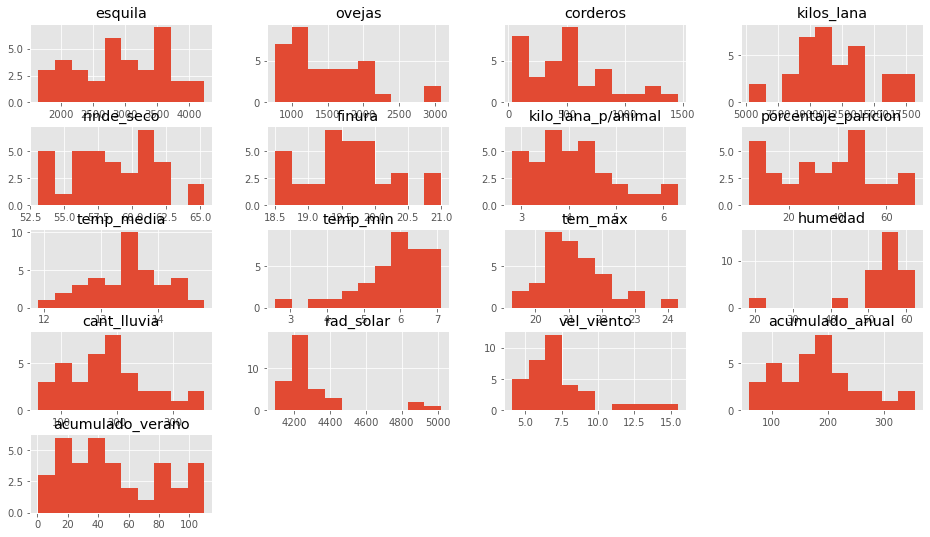

In [5]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

# Regresión Lineal Simple

### Predecir a partir del promedio de lluvia anual la cantidad de lana producida. Según la matriz estas variables no estan correlacionadas. Tiene un valor de 0.19.

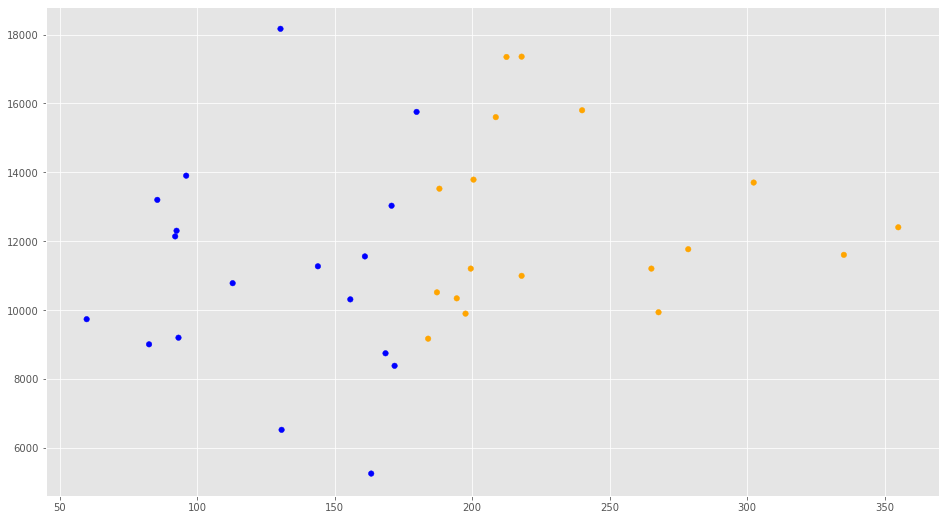

In [41]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['cant_lluvia'].values
f2 = data['kilos_lana'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in data.iterrows():
    if(row['cant_lluvia']>181.74):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [42]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["cant_lluvia"]]
X_train = np.array(dataX)
y_train = data['kilos_lana'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [7.61563563]
Independent term: 
 10429.310576896733
Mean squared error: 8078614.10
Variance score: 0.03


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 7.61 y el término independiente “b” es 10429,31. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

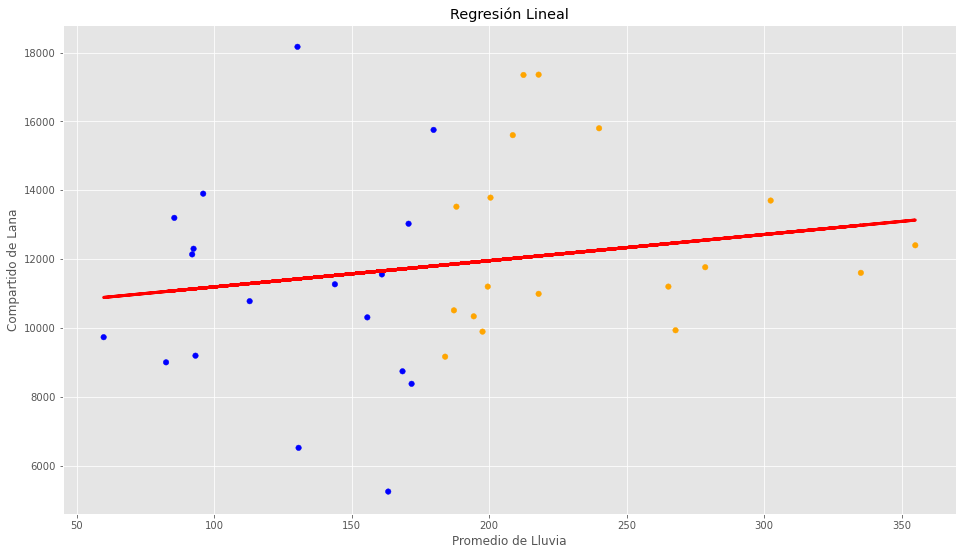

In [43]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Promedio de Lluvia')
plt.ylabel('Compartido de Lana')
plt.title('Regresión Lineal')

plt.show()

In [44]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener por un promedio de lluvia de 200,
# según nuestro modelo, hacemos:
y_p = regr.predict([[200]])
print(round(float(y_p),2))

11952.44


### Predecir a partir de la radiacion solar la finura de la lana producida. Según la matriz estas variables no estan correlacionadas o tienen una muy baja correlacion. Tiene un valor de -0.28.

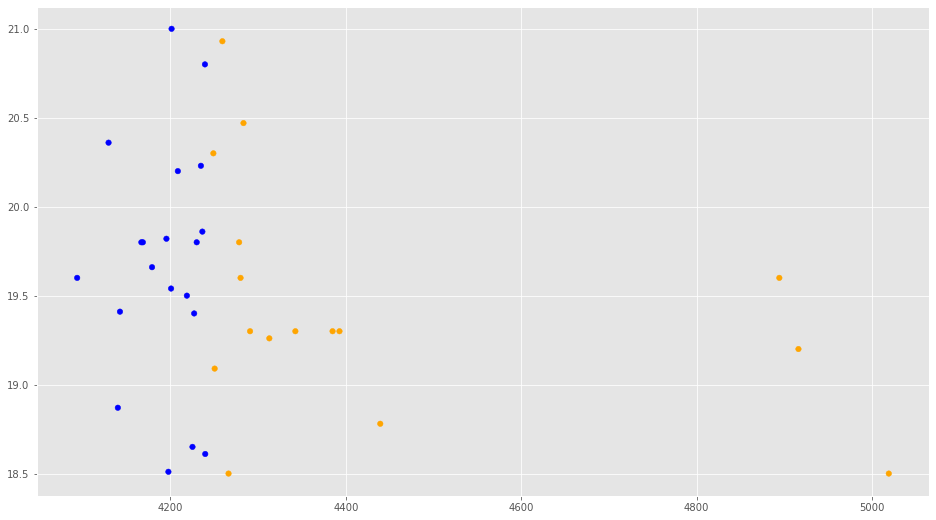

In [37]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['rad_solar'].values
f2 = data['finura'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Radiacion Solar
asignar=[]
for index, row in data.iterrows():
    if(row['rad_solar']>4248.09):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [38]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["rad_solar"]]
X_train = np.array(dataX)
y_train = data['finura'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.00090029]
Independent term: 
 23.443163551726574
Mean squared error: 0.40
Variance score: 0.08


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente -0.0009 y el término independiente “b” es 23.44. Tenemos un Error Cuadrático de 0.4… por lo que este modelo deberia ser mejor que el anterior, pero maso menos igual. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

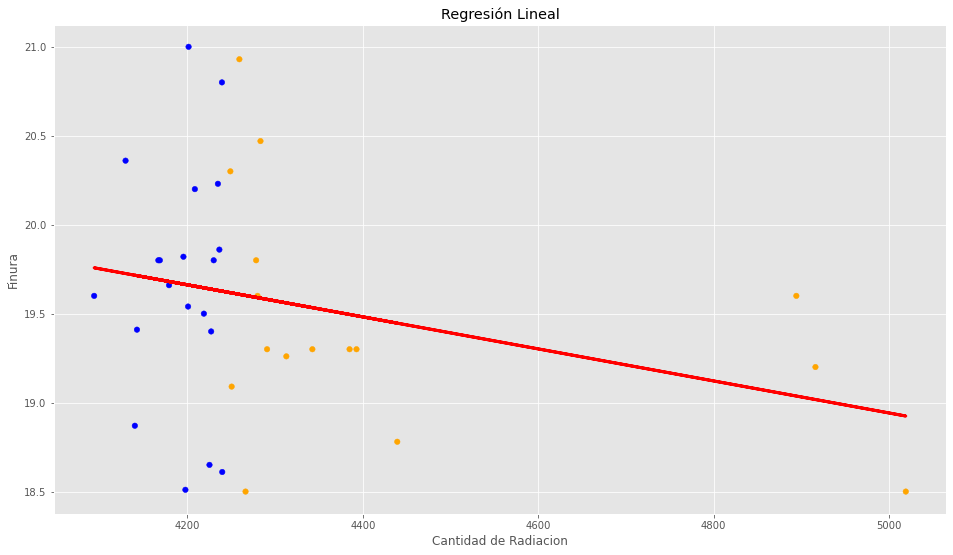

In [39]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Radiacion')
plt.ylabel('Finura')
plt.title('Regresión Lineal')

plt.show()

In [40]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener con una radicion solar de 4589,
# según nuestro modelo, hacemos:
y_p = regr.predict([[4600]])
print(round(float(y_p),2))

19.3


### Predecir a partir de la lluvia acumulada anual la cantidad de lana producida. Según la matriz estas variables no estan correlacionadas. Tiene un valor de 0.19.

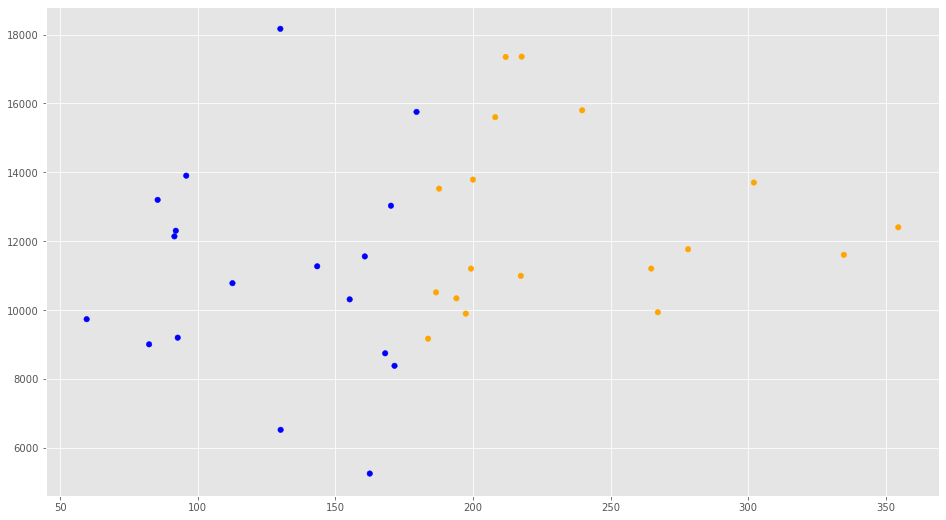

In [30]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['acumulado_anual'].values
f2 = data['kilos_lana'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de acumulado de lluvia anual
asignar=[]
for index, row in data.iterrows():
    if(row['acumulado_anual']>181.34):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [31]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["acumulado_anual"]]
X_train = np.array(dataX)
y_train = data['kilos_lana'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [7.64233282]
Independent term: 
 10427.515517560514
Mean squared error: 8076784.88
Variance score: 0.03


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 7.64 y el término independiente “b” es 10427,51. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

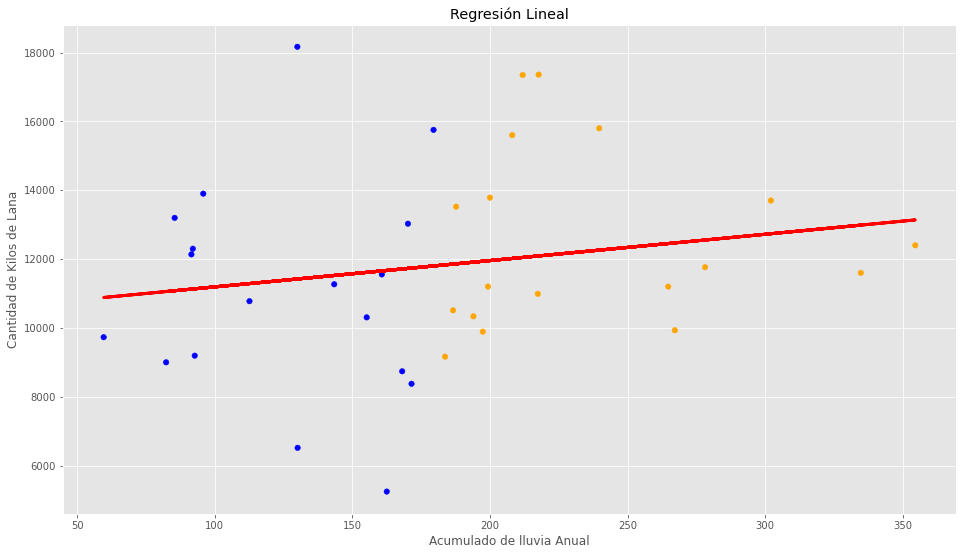

In [32]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Acumulado de lluvia Anual')
plt.ylabel('Cantidad de Kilos de Lana')
plt.title('Regresión Lineal')

plt.show()

In [35]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener con un acumulado de lluvia de 189,
# según nuestro modelo, hacemos:
y_p = regr.predict([[189]])
print(round(float(y_p),2))

11871.92


### Predecir a partir de la lluvia acumulada en el verano la cantidad de lana producida. Según la matriz estas variables no estan correlacionadas. Tiene un valor de -0.13.

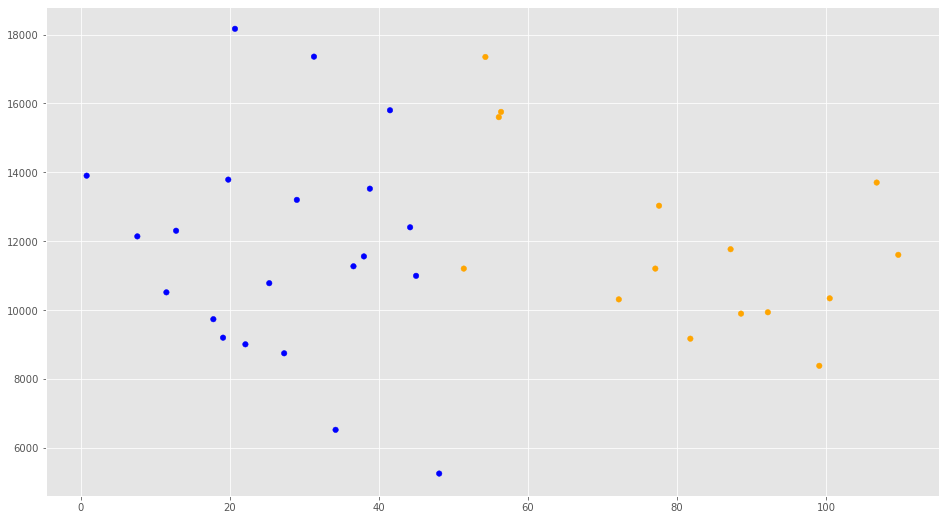

In [45]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['acumulado_verano'].values
f2 = data['kilos_lana'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de acumulado de lluvia anual
asignar=[]
for index, row in data.iterrows():
    if(row['acumulado_verano']>49.51):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [46]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["acumulado_verano"]]
X_train = np.array(dataX)
y_train = data['kilos_lana'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-12.41384456]
Independent term: 
 12428.04660889995
Mean squared error: 8222302.51
Variance score: 0.02


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente -12.41 y el término independiente “b” es 12428,07. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

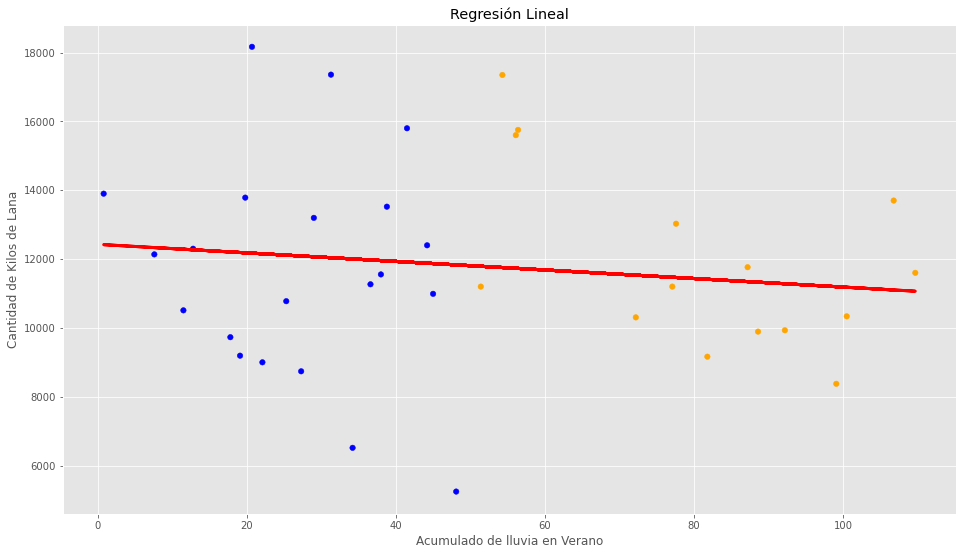

In [47]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Acumulado de lluvia en Verano')
plt.ylabel('Cantidad de Kilos de Lana')
plt.title('Regresión Lineal')

plt.show()

In [48]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener con un acumulado de lluvia de 189,
# según nuestro modelo, hacemos:
y_p = regr.predict([[189]])
print(round(float(y_p),2))

10081.83


OBSERVACION: lo que encuentra es que cuando menos llueve en el verano mas lana hay. !!!!!

### Predecir a partir de la radiacion solar la cantidad de animales que voy a esquilar. Según la matriz estas variables estan correlacionadas o tienen una mediana correlacion. Tiene un valor de 0.45.

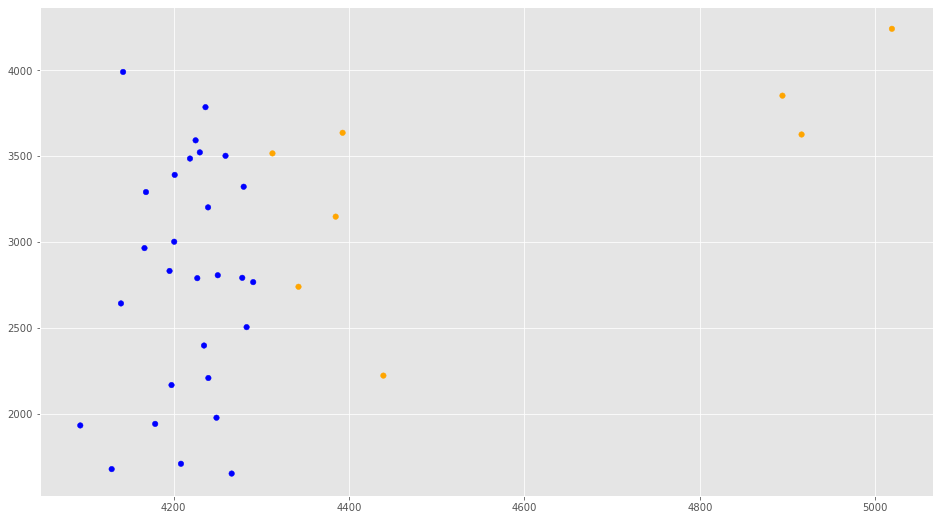

In [49]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['rad_solar'].values
f2 = data['esquila'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de acumulado de lluvia anual
asignar=[]
for index, row in data.iterrows():
    if(row['rad_solar']>4298.09):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [50]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["rad_solar"]]
X_train = np.array(dataX)
y_train = data['esquila'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [1.52758371]
Independent term: 
 -3655.539624510216
Mean squared error: 388670.71
Variance score: 0.21


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 1.52 y el término independiente “b” es -3655,53. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

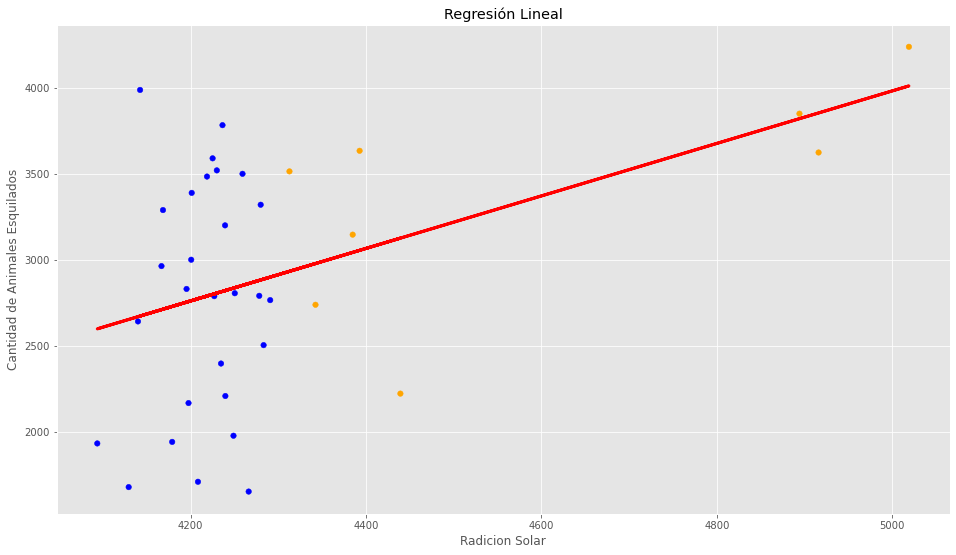

In [51]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Radicion Solar')
plt.ylabel('Cantidad de Animales Esquilados')
plt.title('Regresión Lineal')

plt.show()

In [52]:
# Vamos a comprobar:
# Quiero predecir cuántos animales esquilados voy a obtener con una radicion solar de 4566,
# según nuestro modelo, hacemos:
y_p = regr.predict([[4566]])
print(round(float(y_p),2))

3319.41


### Predecir a partir de la cantidad de animales la cantidad de lana producida. Según la matriz estas variables estan correlacionadas positivamente. Tiene un valor de 0.64.

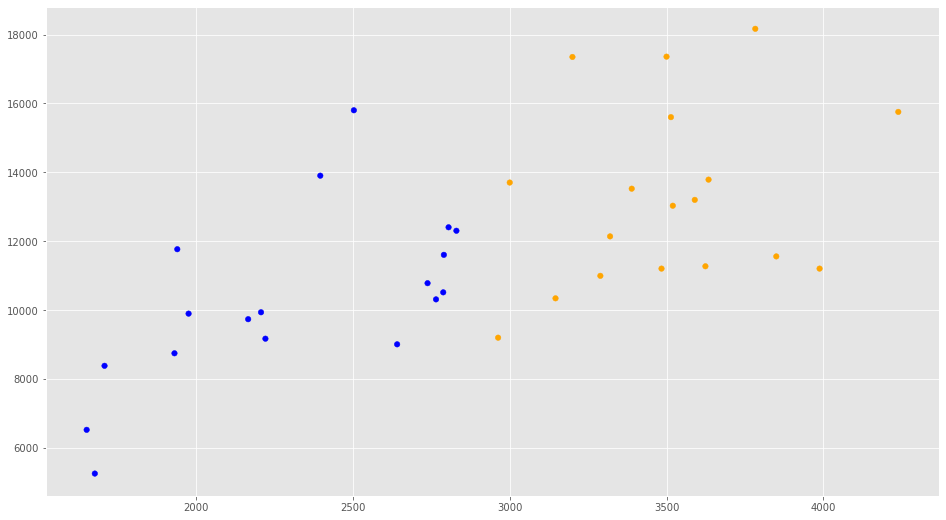

In [7]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['esquila'].values
f2 = data['kilos_lana'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de animales
asignar=[]
for index, row in data.iterrows():
    if(row['esquila']>2910):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [8]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["esquila"]]
X_train = np.array(dataX)
y_train = data['kilos_lana'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [2.65162]
Independent term: 
 4096.732762236207
Mean squared error: 4925834.05
Variance score: 0.41


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 2.65 y el término independiente “b” es -4096.73. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

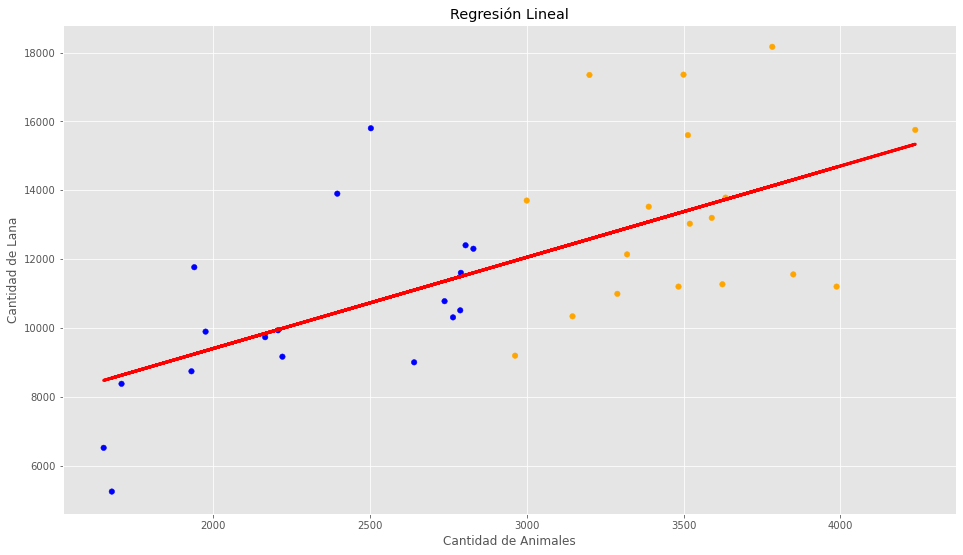

In [9]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Animales')
plt.ylabel('Cantidad de Lana')
plt.title('Regresión Lineal')

plt.show()

In [11]:
# Vamos a comprobar:
# Quiero predecir cuántos kilos dde lana voy a obtener con una cantidad de animales de 3566,
# según nuestro modelo, hacemos:
y_p = regr.predict([[3566]])
print(round(float(y_p),2))

13552.41


### Predecir a partir de la cantidad de ovejas preñadas la cantidad de corderos. Según la matriz estas variables estan correlacionadas positivamente. Tiene un valor de 0.58.

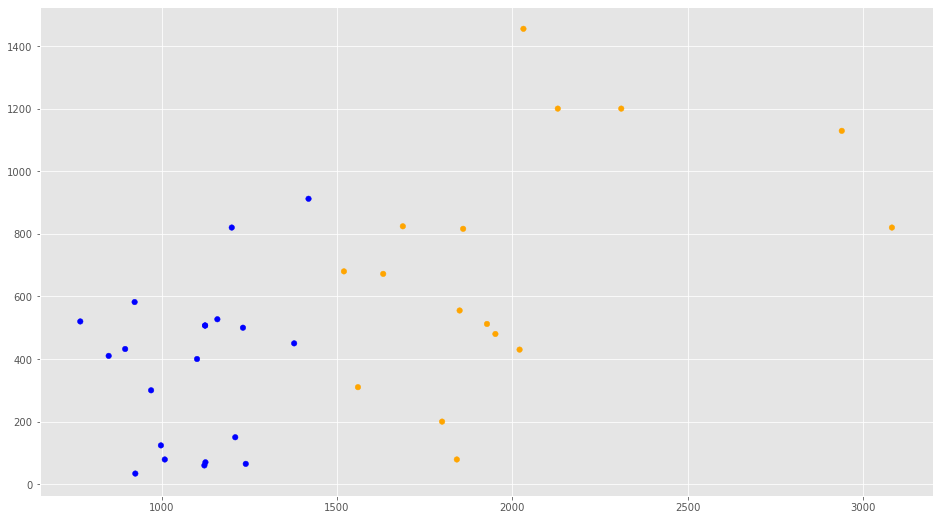

In [12]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['ovejas'].values
f2 = data['corderos'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de animales
asignar=[]
for index, row in data.iterrows():
    if(row['ovejas']>1497):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [13]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["ovejas"]]
X_train = np.array(dataX)
y_train = data['corderos'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.37322061]
Independent term: 
 -36.484123642376176
Mean squared error: 82924.24
Variance score: 0.34


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.37 y el término independiente “b” es -36.48. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

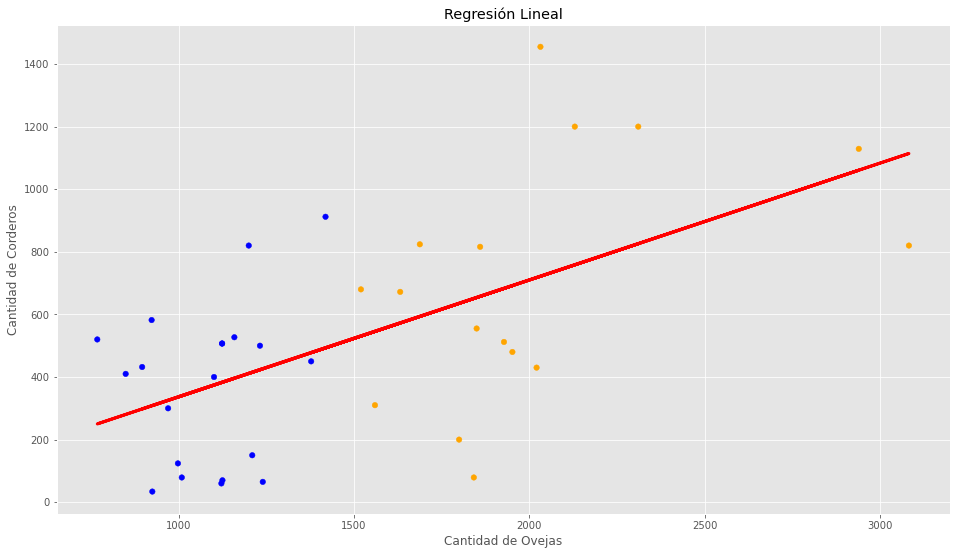

In [14]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Ovejas')
plt.ylabel('Cantidad de Corderos')
plt.title('Regresión Lineal')

plt.show()

In [16]:
# Vamos a comprobar:
# Quiero predecir cuántos kilos dde lana voy a obtener con una cantidad de ovejas de 2566,
# según nuestro modelo, hacemos:
y_p = regr.predict([[2566]])
print(round(float(y_p),2))

921.2


### CONCLUSIÓN: La regresión lineal simple no pareciera ser modelo para estos datos, puede que porque tengamos pocos datos.

Intente predecir variables correlacionalas, medianamente correlacionadas y no correlacionadas, y ninguna predice bien. Mezcle varriables climaticas con las productivas, tambien use productivas con productivas....